Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9026 - loss: 0.3139 - val_accuracy: 0.9708 - val_loss: 0.0934
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9742 - loss: 0.0797 - val_accuracy: 0.9732 - val_loss: 0.0923
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9833 - loss: 0.0505 - val_accuracy: 0.9790 - val_loss: 0.0671
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9880 - loss: 0.0357 - val_accuracy: 0.9783 - val_loss: 0.0775
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9906 - loss: 0.0304 - val_accuracy: 0.9766 - val_loss: 0.0897
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9102 - loss: 0.2890 - val_accuracy: 0.9813 - val_loss: 0.0547
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9836 - loss: 0.0509 - val_accuracy: 0.9849 - val_loss: 0.0510
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9898 - loss: 0.0309 - val_

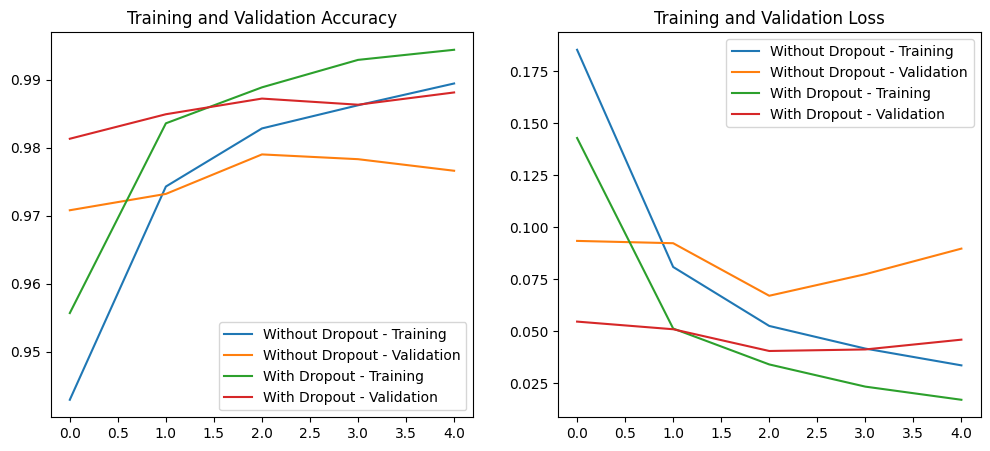

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Reshape



(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train, x_test = x_train / 255.0, x_test / 255.0


x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

model1 = Sequential()
model1.add(Dense(512, activation='relu', input_shape=(784,)))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(10, activation='softmax'))


model2 = Sequential()
model2.add(Reshape((28, 28, 1), input_shape=(784,)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
history2 = model2.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)
test_loss, test_acc = model2.evaluate(x_test, y_test)
print("Test accuracy: ", test_acc)



import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Without Dropout - Training')
plt.plot(history1.history['val_accuracy'], label='Without Dropout - Validation')
plt.plot(history2.history['accuracy'], label='With Dropout - Training')
plt.plot(history2.history['val_accuracy'], label='With Dropout - Validation')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Without Dropout - Training')
plt.plot(history1.history['val_loss'], label='Without Dropout - Validation')
plt.plot(history2.history['loss'], label='With Dropout - Training')
plt.plot(history2.history['val_loss'], label='With Dropout - Validation')
plt.title('Training and Validation Loss')
plt.legend()




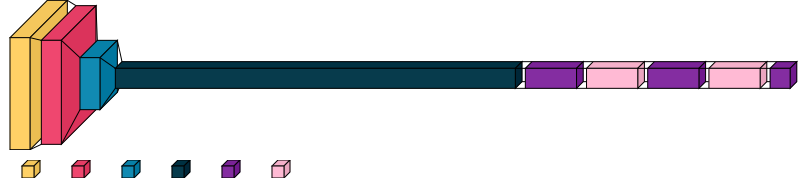

In [ ]:
import visualkeras

visualkeras.layered_view(model2,legend=True ,to_file='out.png')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


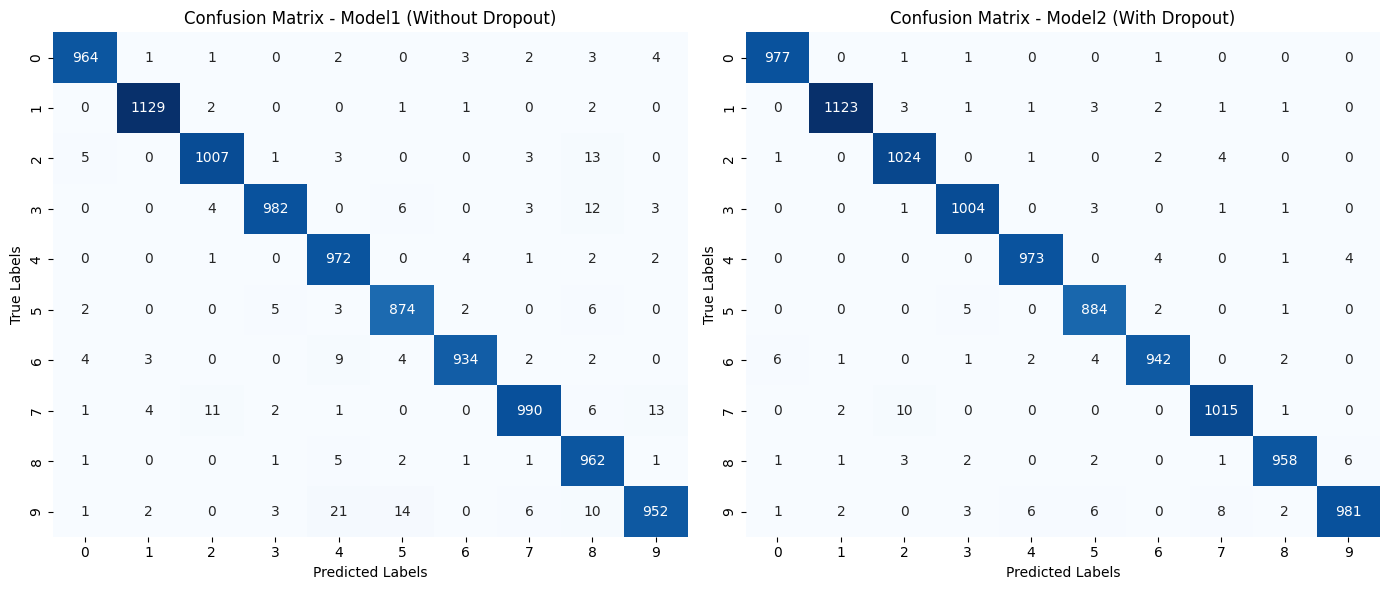

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred1 = model1.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)

conf_matrix1 = confusion_matrix(y_test, y_pred_classes1)

y_pred2 = model2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)

conf_matrix2 = confusion_matrix(y_test, y_pred_classes2)

plt.figure(figsize=(14, 6))

# Confusion matrix for model1
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Model1 (Without Dropout)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Confusion matrix for model2
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Model2 (With Dropout)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()


# HW1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2734 - loss: 2.0099 - val_accuracy: 0.3523 - val_loss: 1.7768
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3940 - loss: 1.7060 - val_accuracy: 0.4118 - val_loss: 1.6391
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4171 - loss: 1.6214 - val_accuracy: 0.4235 - val_loss: 1.6100
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4349 - loss: 1.5809 - val_accuracy: 0.4457 - val_loss: 1.5496
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4521 - loss: 1.5303 - val_accuracy: 0.4410 - val_loss: 1.5393
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3866 - loss: 1.6753 - val_accuracy: 0.5764 - val_loss: 1.1744
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.5986 - loss: 1.1341 - val_accuracy: 0.6090 - val_loss: 1.1026
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6562 - loss: 0.9629 - val_a

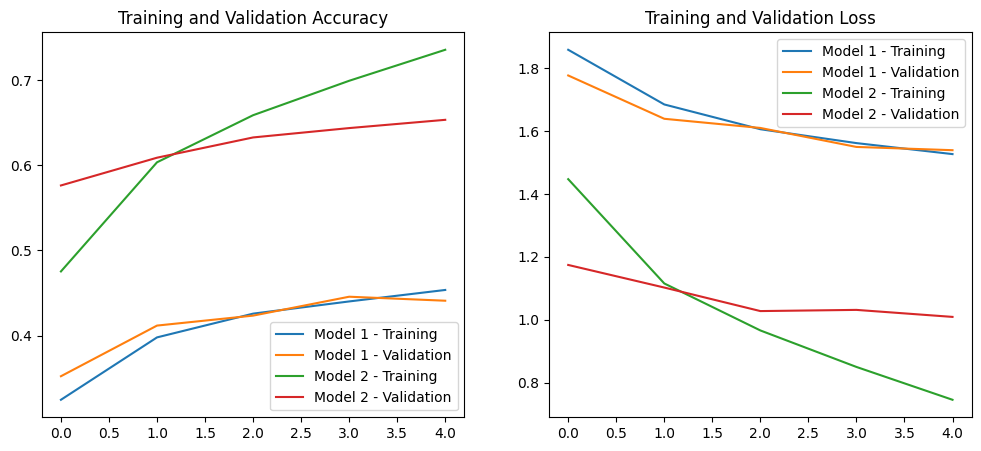

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model1 = Sequential()
model1.add(Flatten(input_shape=(32, 32, 3)))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))


model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history1 = model1.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
history2 = model2.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Model 1 Test accuracy: ", test_acc)
test_loss, test_acc = model2.evaluate(x_test, y_test)
print("Model 2 Test accuracy: ", test_acc)

plt.figure(figsize=(12, 5))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Model 1 - Training')
plt.plot(history1.history['val_accuracy'], label='Model 1 - Validation')
plt.plot(history2.history['accuracy'], label='Model 2 - Training')
plt.plot(history2.history['val_accuracy'], label='Model 2 - Validation')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Model 1 - Training')
plt.plot(history1.history['val_loss'], label='Model 1 - Validation')
plt.plot(history2.history['loss'], label='Model 2 - Training')
plt.plot(history2.history['val_loss'], label='Model 2 - Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


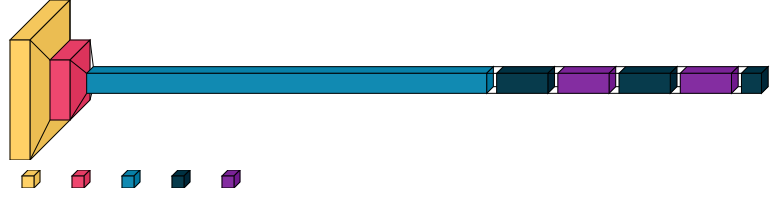

In [ ]:
import visualkeras

visualkeras.layered_view(model2,legend=True ,to_file='out.png')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


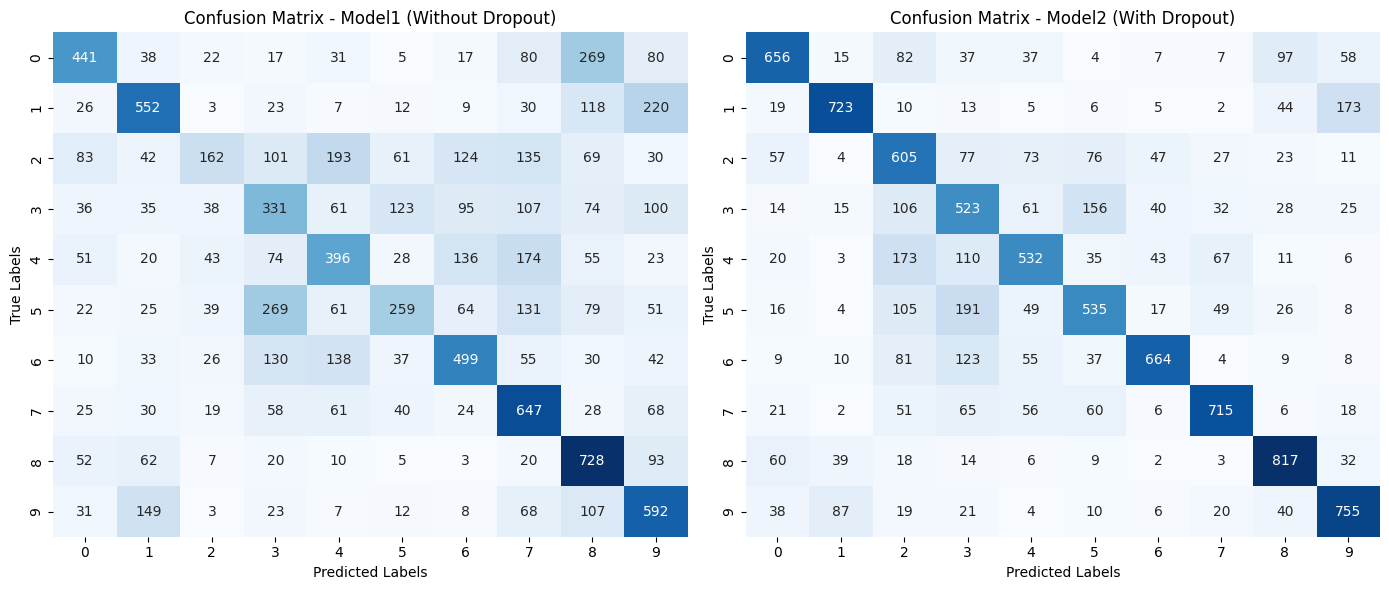

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred1 = model1.predict(x_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)


conf_matrix1 = confusion_matrix(y_test, y_pred_classes1)


y_pred2 = model2.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)


conf_matrix2 = confusion_matrix(y_test, y_pred_classes2)


plt.figure(figsize=(14, 6))

# Confusion matrix for model1
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Model1 (Without Dropout)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Confusion matrix for model2
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Model2 (With Dropout)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()
